In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
import openpyxl
from statistics import * 
from cycler import cycler
from scipy import stats
from gcplot import gc
import importlib
from collections import Counter
from datetime import datetime
import os
from openpyxl import load_workbook

### Step 1: Enter file information here
- Populate `file_list` with names of files in *chronological order* (newest first). If samples with the same names are detected, the samples in the newest files will override the samples in older files.    
- Populate `sheet` with the name of the Excel sheet containing the corrected concentration data. This name should be the same across all Excel files.
- Populate `remove_list` with names of samples that should be disregarded from all files (if desired).  Otherwise, leave as empty list.

In [2]:
file_list = [
    'GCData_R227X w Conc Data - July 2021.xlsx',
    'GCData_BTE_variants w Conc Data - June 2021.xlsx',
    'GCData_BTE_variants w Conc Data - May 2021.xlsx',
    'GCData_LP_FAME w Conc Data - Apr 2021.xlsx',
    'GCData_Acid_FAME w Conc Data - Feb 2021.xlsx',
    'GCData_Jan_2021 w Conc Data - Jan 2021.xlsx',
    'GCData_KCM_mutants-R2 w Conc Data - Dec 2020.xlsx',
    'GCData_M133X w Conc Data - Dec 2020.xlsx',
    'GCData_mutants-Nov19-ext_std_refined w Conc Data - Nov 2020.xlsx',
    'GCData-AM_mutantsKCM2 w Conc Data.xlsx',
    'GCData-AM_mutantsKCM1 w Conc Data.xlsx',
    'GCData-AM_mutants15-16 w Conc Data.xlsx',
    'GCData-AM_mutants1-9 w Conc Data - Aug 2020.xlsx',
    'GCData-SSM_mutants5-8 w Conc Data.xlsx',
    'GCData-SSM_mutants1-4 w Conc Data.xlsx',
]

sheet = 'Corrected Concentration'

remove_sample_list = ['BTE-QE', 'BTE_AW', 'BTE_BP_Mut', 'BTE_WT', 'FAME', 'WT', 'WT_A', 'Neg', 'Neg_A','Rec']#, 'BTE', ]
remove_product_list = ['C17:cp']

- Run `gc.load_data` to get the corrected concentration data from each Excel file. 
- Set the `output` option to **`True`** to see which products and samples were detected from each file, or set to **`False`** to hide output.
  - The products and samples in <span style="color:#ba4046">red</span> are those that were removed from the dataframe as specified by `remove_product_list` and `remove_sample_list`, respectively.
  - The samples in <span style="color:#b5821b">yellow</span> are duplicates that have been overridden by a higher priority file.
  - The samples in <span style="color:#2e8d4e">green</span> are those that will have their data included in the analysis and visualiziation.

In [3]:
importlib.reload(gc)
master_df, master_sample_list, df_dict = gc.load_data(file_list, sheet, remove_sample_list, remove_product_list, output = True)

GCData_R227X w Conc Data - July 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE', 'BTE_AW', 'H204A', 'M133L_M222K_R227H', 'M133L_M222K_R227H_AW', 'R227A', 'R227D', 'R227F', 'R227H', 'Rec']
GCData_BTE_variants w Conc Data - June 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE', 'H204A', 'KCM2', 'KCM250', 'KCM280', 'KCM3', 'KCM35', 'KCM7', 'Rec']
GCData_BTE_variants w Conc Data - May 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE', 'BTE_M133F_M222K', 'BTE_M222K_R227H']
GCData_LP_FAME w Conc Data - Apr 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE_WT', 'H204A', 'BTE_LP_Mut', 'BTE_B

### Step 2: Enter plotting information here
- Populate `samples` with names of samples in the order you wish to plot data for. Set to **`None`** to plot all data.    
- Populate `chains` with the names of the products in the order you wish to plot data for. Set to **`None`** to plot all products in the default order (alphanumeric).   

In [4]:
samples = ['BTE', 'H204A', 'M133L_M222K_R227H', 'M133L_M222K_R227H_AW', 'R227A', 'R227D', 'R227F', 'R227H']
chains = ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']

- Enter plot formatting options here

In [5]:
title = 'Free fatty acid distribution of ClFatB3 variants' #graph title
ylabel = 'mg/L FAME' #y axis label
graphWidth = 9 #Default 6.0
graphHeight = 4 #Default 4.0
barWidth = 0.6 #Default 0.8
legendLocation = 'upper left' #Default 'best' or Choose: 'upper right/center/left', 'lower right/center/left'
plotDistribution = False

csfont = {'fontname':'Times New Roman'}
colorwheel = ('olivedrab', 'orange', 'orange', 'indianred','indianred','blueviolet','blueviolet','palevioletred','palevioletred','skyblue','skyblue')
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.prop_cycle'] = cycler(color=colorwheel)

### Python Default
#plt.rcParams["font.family"] = 'DejaVu Sans'

### Step 3: Analyze and visualize data

In [6]:
importlib.reload(gc)
df_mean, df_scaled, df_err = gc.dataParse(master_df, samples, chains)
summary_stats = gc.summary_stats(master_df, samples, chains)

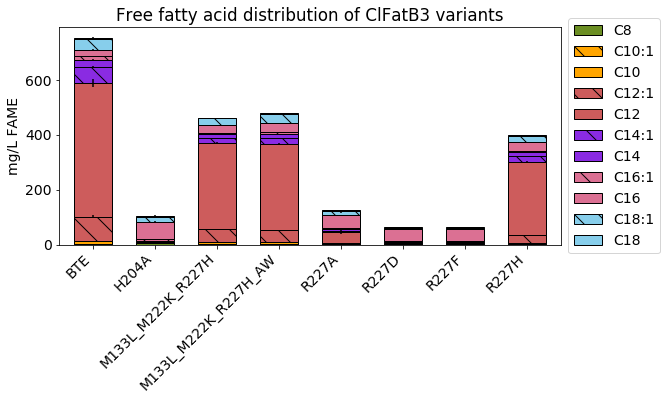

In [7]:
fig, axs = plt.subplots(1, 1, figsize = (graphWidth, graphHeight))
df_mean.plot.bar(ax = axs, stacked=True, edgecolor = 'k', width = barWidth, yerr = df_err, title = title)

# After plotting, set the hatches such that the hatch pattern alternates
gc.set_hatch(axs, df_mean.columns)

# Plot formatting
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_ylabel(ylabel)
axs.set_xlabel('')
# Show plot legend
axs.legend(bbox_to_anchor = [1,.5], loc='center left');
plt.show()

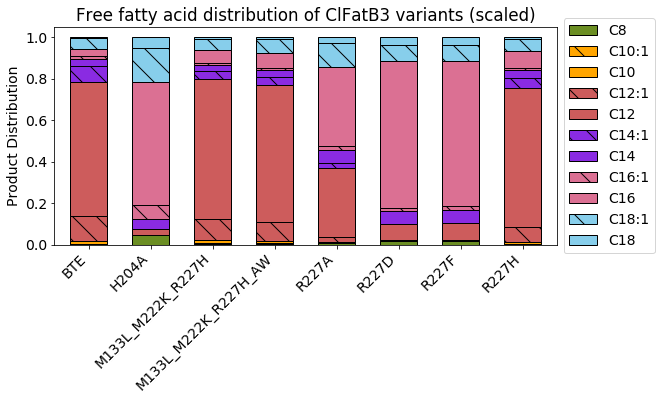

In [8]:
fig, axs = plt.subplots(1, 1, figsize = (graphWidth, graphHeight))

df_scaled.plot.bar(ax = axs, stacked=True, edgecolor = 'k', width = barWidth, title = title + ' (scaled)')

# After plotting, set the hatches such that the hatch pattern alternates
gc.set_hatch(axs, df_scaled.columns)

# Plot formatting
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_ylabel('Product Distribution')
axs.set_xlabel('')
# Show plot legend
axs.legend(bbox_to_anchor = [1,.5], loc='center left');
plt.show()

In [9]:
summary_stats

,% C8,% C10:1,% C10,% C12:1,% C12,% C14:1,% C14,% C16:1,% C16,% C18:1,% C18,Source File
BTE,0.07±0.00686,0.096±0.0132,0.397±0.0456,4.07±0.592,21.6±2.27,2.65±0.317,1.07±0.095,0.549±0.0549,0.966±0.0823,1.78±0.174,0.056±0.0154,GCData_R227X w Conc Data - July 2021.xlsx
H204A,0.893±0.326,0±0,0.0677±0.0199,0±0,0.515±0.0295,0.0485±0.0191,0.991±0.0595,1.25±0.2,11.9±0.338,3.28±0.365,1.03±0.314,GCData_R227X w Conc Data - July 2021.xlsx
M133L_M222K_R227H,0.277±0.00351,0.297±0.0198,1.51±0.0502,10.1±0.285,67.8±0.478,3.94±0.0369,2.87±0.0998,0.924±0.052,6.19±0.308,5.56±0.316,0.526±0.0158,GCData_R227X w Conc Data - July 2021.xlsx
M133L_M222K_R227H_AW,0.271±0.00767,0.274±0.0105,1.34±0.0282,9.04±0.103,65.9±0.308,4.06±0.0169,3.37±0.0321,1.14±0.0327,7.22±0.138,6.76±0.183,0.617±0.019,GCData_R227X w Conc Data - July 2021.xlsx
R227A,0.938±0.154,0±0,0.508±0.0489,2.18±0.547,32.3±2.65,2.23±0.438,6.44±0.454,2.29±0.151,39.5±5.37,11±2.42,2.56±0.137,GCData_R227X w Conc Data - July 2021.xlsx
R227D,1.78±0.0237,0±0,0.513±0.257,0±0,7.43±0.171,0±0,6.31±0.112,1.72±0.0909,70.7±0.123,7.87±0.143,3.69±0.123,GCData_R227X w Conc Data - July 2021.xlsx
R227F,1.79±0.0167,0±0,0.572±0.288,0±0,8.15±0.1,0±0,6.12±0.119,1.86±0.202,70±0.474,7.83±0.201,3.64±0.0262,GCData_R227X w Conc Data - July 2021.xlsx
R227H,0.306±0.00554,0±0,0.737±0.0307,7.47±0.234,67±0.844,5.09±0.03,3.59±0.198,0.876±0.0712,8.4±0.331,5.85±0.465,0.67±0.0204,GCData_R227X w Conc Data - July 2021.xlsx


### Step 4: Write summary table to Excel file

In [14]:
importlib.reload(gc)
saveAs = 'Summary Statistics3.xlsx'
sheet = 'Table2'
gc.save_df_to_excel(summary_stats, saveAs, sheet, replace = False) 

C:\Users\rkong\Desktop\GitHub\GC_Code\Ryan\Repository\Summary Statistics3.xlsx
Done!
